In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## stations
#### import stations, remove closed stations and change dates to datetime

In [425]:
stations = pd.read_csv('data/Seattle_cycles_station.csv')
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [426]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [427]:
stations = stations[stations['current_dockcount'] > 0]

In [428]:
stations = stations.drop(['decommission_date','install_date', 'install_dockcount','modification_date'], axis=1)
stations.head()

,station_id,name,lat,long,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20


## trips
#### import trips, split start date and time and convert to datetime, remove duplicate trips

In [429]:
trips = pd.read_csv('data/Seattle_cycles_trip.csv')
trips.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\260303090.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/Seattle_cycles_trip.csv')


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1971


In [430]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181558 non-null  object 
 11  birthyear          181554 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.3+ MB


In [431]:
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['start_date'] = trips['starttime'].dt.date
trips['start_date'] = pd.to_datetime(trips['start_date'])

In [432]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   stoptime           286858 non-null  object        
 3   bikeid             286858 non-null  object        
 4   tripduration       286858 non-null  float64       
 5   from_station_name  286858 non-null  object        
 6   to_station_name    286858 non-null  object        
 7   from_station_id    286858 non-null  object        
 8   to_station_id      286858 non-null  object        
 9   usertype           286858 non-null  object        
 10  gender             181558 non-null  object        
 11  birthyear          181554 non-null  object        
 12  start_date         286858 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), 

In [433]:
trips.duplicated().sum()

25181

In [434]:
trips = trips.drop_duplicates()

In [435]:
trips.duplicated().sum()

0

In [436]:
trips = trips.drop(['starttime', 'stoptime', 'bikeid', 'tripduration', 'to_station_name', 'to_station_id', 'usertype', 'gender', 'birthyear'],axis=1)
trips = trips.reset_index(drop=True)

In [437]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261677 entries, 0 to 261676
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            261677 non-null  int64         
 1   from_station_name  261677 non-null  object        
 2   from_station_id    261677 non-null  object        
 3   start_date         261677 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.0+ MB


## merge stations and trips
#### extract month_year and day_of_week for each trip
#### groupby the number of trips per day per station 

In [438]:
df_merge_1 = pd.merge(left=stations, right=trips, left_on='station_id', right_on='from_station_id')
df_merge_1 = df_merge_1.drop(['from_station_name','from_station_id'], axis=1).rename(columns={'start_date':'Date'})
df_merge_1.head()

,station_id,name,lat,long,current_dockcount,trip_id,Date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,680,2014-10-13
1,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,692,2014-10-13
2,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,693,2014-10-13
3,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,753,2014-10-13
4,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,754,2014-10-13


In [439]:
df_merge_1['Month'] = df_merge_1['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_merge_1[['Month','trip_id']].groupby(['Month']).count().sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True)).reset_index().rename(columns={'trip_id': 'trip_count'})


,Month,trip_count
0,January,17669
1,February,17548
2,March,22654
3,April,24995
4,May,25244
5,June,26663
6,July,31477
7,August,29655
8,September,12673
9,October,16541


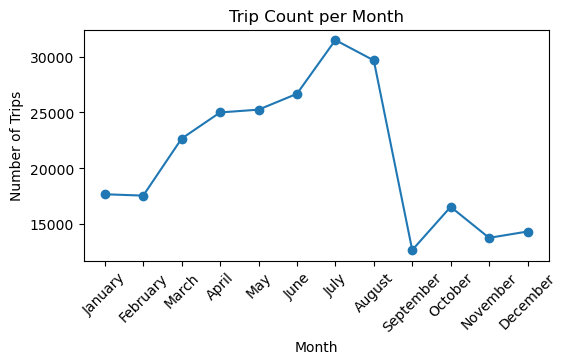

In [440]:
# Group by date and count the number of occurrences of 'trip_id'
count_per_month = df_merge_1[['Month','trip_id']].groupby(['Month']).count().sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True)).reset_index()

# Plotting the time series
plt.figure(figsize=(6, 3))
plt.plot(count_per_month['Month'], count_per_month['trip_id'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trip Count per Month')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [441]:
df_merge_1['Day_of_Week'] = df_merge_1['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_merge_1[['Day_of_Week','trip_id']].groupby(['Day_of_Week']).count().sort_values(by='Day_of_Week', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True)).reset_index().rename(columns={'trip_id': 'trip_count'})

,Day_of_Week,trip_count
0,Monday,37369
1,Tuesday,38210
2,Wednesday,38497
3,Thursday,39265
4,Friday,38813
5,Saturday,32847
6,Sunday,28217


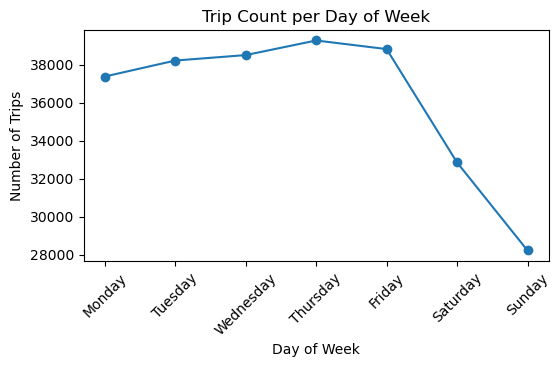

In [442]:
# Group by date and count the number of occurrences of 'trip_id'
count_per_day = df_merge_1[['Day_of_Week','trip_id']].groupby(['Day_of_Week']).count().sort_values(by='Day_of_Week', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True)).reset_index()

# Plotting the time series
plt.figure(figsize=(6, 3))
plt.plot(count_per_day['Day_of_Week'], count_per_day['trip_id'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trip Count per Day of Week')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Weather
#### import weather. change to datetime, try to impute missing gust speed values and fill nans in Events

In [443]:
pd.set_option('display.max_columns', 100)
weather = pd.read_csv('data/Seattle_weather_daily.csv')
weather.head(7)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain
5,10/18/2014,68,64.0,59,59,57,55,90,83,68,29.96,29.90,29.80,10,8,2,10,4,-,0.31,Rain
6,10/19/2014,73,64.0,55,57,55,53,94,74,52,29.80,29.73,29.67,10,10,6,10,3,18,0.00,NaN


In [444]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          688 non-null    float64
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [445]:
weather['Events'] = weather['Events'].replace({'Rain-Thunderstorm':'Rain , Thunderstorm', 'Fog-Rain': 'Fog , Rain', 'Rain-Snow': 'Rain , Snow'})

In [446]:
weather['Events'] = weather['Events'].fillna('Clear')


In [447]:
weather[weather['Mean_Temperature_F'].isna()]

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
489,2/14/2016,55,NaN,55,50,50,50,82,82,82,30.12,30.12,30.12,10,10,10,23,23,NaN,0.0,Clear


In [448]:
weather['Mean_Temperature_F'] = weather['Mean_Temperature_F'].fillna(55.0)

In [449]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [450]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        689 non-null    datetime64[ns]
 1   Max_Temperature_F           689 non-null    int64         
 2   Mean_Temperature_F          689 non-null    float64       
 3   Min_TemperatureF            689 non-null    int64         
 4   Max_Dew_Point_F             689 non-null    int64         
 5   MeanDew_Point_F             689 non-null    int64         
 6   Min_Dewpoint_F              689 non-null    int64         
 7   Max_Humidity                689 non-null    int64         
 8   Mean_Humidity               689 non-null    int64         
 9   Min_Humidity                689 non-null    int64         
 10  Max_Sea_Level_Pressure_In   689 non-null    float64       
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64       

### impute missing values in gust_speed col using IterativeImputer

In [451]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [452]:
df = weather.drop(['Events','Date'], axis=1)

In [453]:
df['Max_Gust_Speed_MPH'].unique()

array(['21', '17', '25', '-', '18', '22', '41', '30', '24', '20', '37',
       '16', '33', '28', '29', '32', '26', '38', '46', '23', '31', '36',
       '34', '39', nan, '52'], dtype=object)

In [454]:
df['Max_Gust_Speed_MPH'] = df['Max_Gust_Speed_MPH'].replace({'-':None})

In [455]:
df['Max_Gust_Speed_MPH'].unique()

array(['21', '17', '25', None, '18', '22', '41', '30', '24', '20', '37',
       '16', '33', '28', '29', '32', '26', '38', '46', '23', '31', '36',
       '34', '39', nan, '52'], dtype=object)

In [456]:
df['Max_Gust_Speed_MPH'] = df['Max_Gust_Speed_MPH'].astype(float)

In [457]:
df.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In
0,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21.0,0.00
1,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17.0,0.11
2,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25.0,0.45
3,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,NaN,0.00
4,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,NaN,0.14


In [458]:
it = IterativeImputer()
it.fit_transform(df)

array([[71.        , 62.        , 54.        , ...,  4.        ,
        21.        ,  0.        ],
       [63.        , 59.        , 55.        , ...,  5.        ,
        17.        ,  0.11      ],
       [62.        , 58.        , 54.        , ...,  7.        ,
        25.        ,  0.45      ],
       ...,
       [81.        , 68.        , 55.        , ...,  4.        ,
        16.85153317,  0.        ],
       [70.        , 64.        , 57.        , ...,  9.        ,
        18.        ,  0.        ],
       [71.        , 65.        , 59.        , ...,  8.        ,
        23.46675612,  0.        ]])

In [459]:
df2 = pd.DataFrame(it.fit_transform(df))

In [460]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,71.0,62.0,54.0,55.0,51.0,46.0,87.0,68.0,46.0,30.03,29.79,29.65,10.0,10.0,4.0,13.0,4.0,21.000000,0.00
1,63.0,59.0,55.0,52.0,51.0,50.0,88.0,78.0,63.0,29.84,29.75,29.54,10.0,9.0,3.0,10.0,5.0,17.000000,0.11
2,62.0,58.0,54.0,53.0,50.0,46.0,87.0,77.0,67.0,29.98,29.71,29.51,10.0,9.0,3.0,18.0,7.0,25.000000,0.45
3,71.0,61.0,52.0,49.0,46.0,42.0,83.0,61.0,36.0,30.03,29.95,29.81,10.0,10.0,10.0,9.0,4.0,15.840354,0.00
4,64.0,60.0,57.0,55.0,51.0,41.0,87.0,72.0,46.0,29.83,29.78,29.73,10.0,10.0,6.0,8.0,3.0,14.273680,0.14


In [461]:
weather['Max_Gust_Speed_MPH'] = df2[17].round(2)

In [462]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        689 non-null    datetime64[ns]
 1   Max_Temperature_F           689 non-null    int64         
 2   Mean_Temperature_F          689 non-null    float64       
 3   Min_TemperatureF            689 non-null    int64         
 4   Max_Dew_Point_F             689 non-null    int64         
 5   MeanDew_Point_F             689 non-null    int64         
 6   Min_Dewpoint_F              689 non-null    int64         
 7   Max_Humidity                689 non-null    int64         
 8   Mean_Humidity               689 non-null    int64         
 9   Min_Humidity                689 non-null    int64         
 10  Max_Sea_Level_Pressure_In   689 non-null    float64       
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64       

## Checking for correlation in Weather data columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\3840240055.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(method='pearson'),


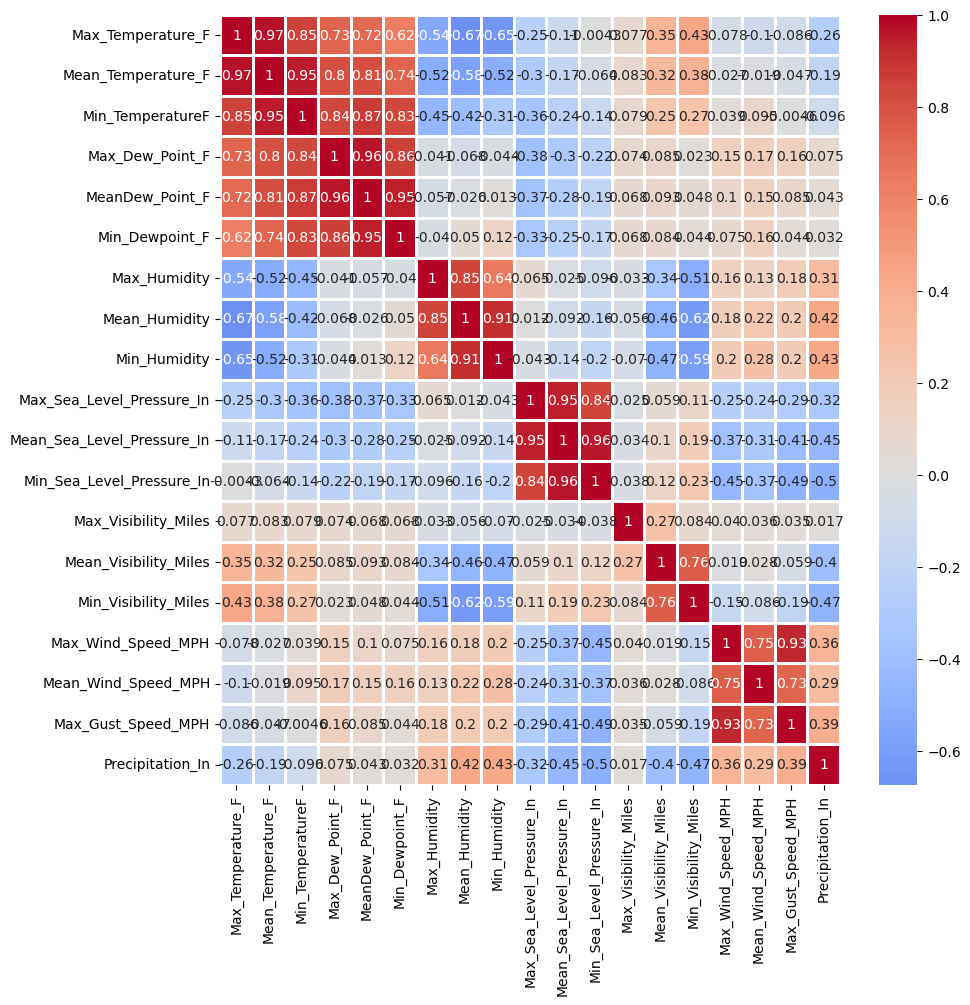

In [463]:
import seaborn as sns
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(weather.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

In [464]:
weather = weather[['Date','Mean_Temperature_F','Mean_Sea_Level_Pressure_In','Mean_Visibility_Miles','Mean_Wind_Speed_MPH','Precipitation_In','Events']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\4278275620.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(method='pearson'),


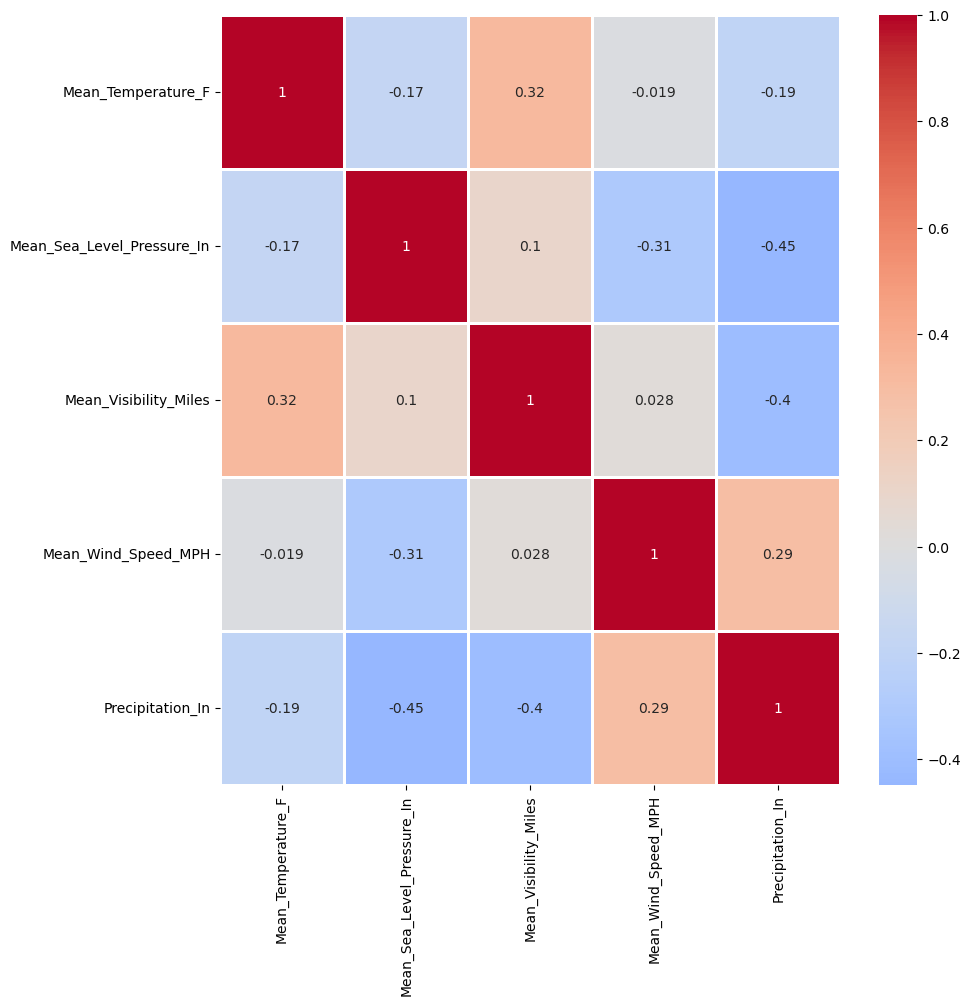

In [465]:
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(weather.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

### grouping the data by date and station 
- count the number of trips on each day for each station by grouping by date and by station and counting a column
- then merge that with the original weather df that contains weather info for each day

In [466]:
agg_df = df_merge_1[['Date','name','trip_id']].groupby(['Date','name']).count().reset_index()
agg_df.head()

,Date,name,trip_id
0,2014-10-13,12th Ave & E Denny Way,6
1,2014-10-13,12th Ave & E Mercer St,5
2,2014-10-13,12th Ave & NE Campus Pkwy,6
3,2014-10-13,15th Ave E & E Thomas St,11
4,2014-10-13,15th Ave NE & NE 40th St,3


In [467]:
agg_df = pd.merge(left=agg_df, right=weather, on='Date')
agg_df = agg_df.rename(columns={'trip_id':'trip_count'})
agg_df.head()

,Date,name,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events
0,2014-10-13,12th Ave & E Denny Way,6,62.0,29.79,10,4,0.0,Rain
1,2014-10-13,12th Ave & E Mercer St,5,62.0,29.79,10,4,0.0,Rain
2,2014-10-13,12th Ave & NE Campus Pkwy,6,62.0,29.79,10,4,0.0,Rain
3,2014-10-13,15th Ave E & E Thomas St,11,62.0,29.79,10,4,0.0,Rain
4,2014-10-13,15th Ave NE & NE 40th St,3,62.0,29.79,10,4,0.0,Rain


In [468]:
agg_df['month_year'] = agg_df['Date'].dt.to_period('M')
agg_df['Day_of_Week'] = agg_df['Date'].dt.day_name()
# agg_df['Month'] = agg_df['Date'].dt.month_name()

In [469]:
agg_df = agg_df.sort_values('trip_count', ascending=False)
agg_df

,Date,name,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
33,2014-10-13,Occidental Park / Occidental Ave S & S Washington St,71,62.0,29.79,10,4,0.00,Rain,2014-10,Monday
7939,2015-04-18,Pier 69 / Alaskan Way & Clay St,69,57.0,30.31,10,2,0.00,Rain,2015-04,Saturday
13145,2015-08-09,Pier 69 / Alaskan Way & Clay St,66,72.0,29.96,10,5,0.00,Clear,2015-08,Sunday
8880,2015-05-09,Pier 69 / Alaskan Way & Clay St,66,66.0,30.06,10,2,0.00,Clear,2015-05,Saturday
10469,2015-06-13,Pier 69 / Alaskan Way & Clay St,63,64.0,30.07,10,3,0.00,Clear,2015-06,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
27795,2016-06-29,Mercer St & 9th Ave N,1,65.0,30.18,10,5,0.00,Clear,2016-06,Wednesday
20582,2016-01-26,12th Ave & NE Campus Pkwy,1,50.0,30.24,9,4,0.27,Rain,2016-01,Tuesday
16006,2015-10-08,UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1,64.0,30.09,9,1,0.00,Clear,2015-10,Thursday
20564,2016-01-25,NE Pacific St/UW Medical Center,1,45.0,30.23,10,2,0.00,Clear,2016-01,Monday


In [470]:
pd.set_option('display.max_colwidth', 50)
stations_zip = stations
stations_zip.head()


,station_id,name,lat,long,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20


In [471]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")


stations_zip['zipcode'] = stations_zip.apply(lambda row: geolocator.reverse((row['lat'], row['long']), language='en').raw.get('address', {}).get('postcode', 'ZIP code not found'), axis=1)
stations_zip


In [ ]:
pd.set_option('display.max_colwidth', 100)
stations_zip

In [ ]:
stations_zip['zipcode'].unique()

In [ ]:
# not on zipcode income list - 98174 (should be 98104), 98191 (should be 98122 and 98109 for Lake Union Park / Valley St & Boren Ave N), 98015 (should be 98102), 98195 ( should be 98105 )

In [ ]:
stations_zip['zipcode'] = stations_zip['zipcode'].astype(int).replace({98174:98104, 98191:98122, 98015:98102, 98195:98105})
stations_zip = stations_zip.reset_index(drop=True)

In [ ]:
stations_zip.iloc[35,5] = 98109

In [ ]:
stations_zip.head()

In [ ]:
merged_zipcode_df = pd.merge(left=stations_zip, right= agg_df, on='name')
merged_zipcode_df.head()

### import and merge income data per zipcode

In [ ]:
cycle_stat_zipcode_income = pd.read_csv('data/cycle_stat_zipcode_income.csv')
cycle_stat_zipcode_income = cycle_stat_zipcode_income.drop('weighted_income', axis=1)
cycle_stat_zipcode_income.head()

In [ ]:
merged_income_df = pd.merge(left=cycle_stat_zipcode_income, right=merged_zipcode_df, left_on='zip code', right_on = 'zipcode')
merged_income_df.head()

In [ ]:
merged_income_df.columns

In [ ]:
column_order = ['station_id', 'name', 'lat', 'long', 'current_dockcount',
                         'zipcode', 'Date', 'trip_count', 'zip code', 'number of returns',
                         'number of dependents', 'number of elderly returns [3]', 'weighted_av_income',
                         'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
                         'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In',
                         'Events', 'month_year', 'Day_of_Week']
merged_income_df = merged_income_df[column_order].drop('zip code', axis=1)
merged_income_df.head()

In [ ]:
merged_income_df.info()

### import pets data and merge

In [ ]:
num_dog_owners_by_zipcode = pd.read_csv('data/num_dog_owners_by_zipcode.csv')
num_dog_owners_by_zipcode = num_dog_owners_by_zipcode.rename(columns={'zip_code':'zipcode', 'count':'num_dogs'})
num_dog_owners_by_zipcode

In [ ]:
merged_income_pets_df = pd.merge(left=num_dog_owners_by_zipcode, right=merged_income_df, on='zipcode')
merged_income_pets_df.head()

### import schools, parks & venues data and merge

In [ ]:
stations_schools_parks_venues_df = pd.read_csv('data/stations_schools_parks_venues_within_1500m_df.csv')
stations_schools_parks_venues_df.head()

In [ ]:
df = pd.merge(left=stations_schools_parks_venues_df, right=merged_income_pets_df, on='name')
df = df.drop(['lat_x','long_x','station_id_x', 'station_id_y', 'lat_y', 'long_y','Date'],axis=1)

In [ ]:
df.columns

In [ ]:
fig, ax =  plt.subplots(figsize = (10,10))


# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

In [ ]:
df = df.drop(['num_dogs','number of dependents', 'number of elderly returns [3]', 'number of returns'],axis=1)

In [ ]:
fig, ax =  plt.subplots(figsize = (10,10))

# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

In [ ]:
# Histograms
fig = plt.figure(figsize=(16, 16))
for index, col in enumerate(df.columns):
    plt.subplot(6, 3, index + 1)
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col].dropna(), kde=True, stat="density", linewidth=0.5)
        plt.title(col)
    else:
        # Handle non-numeric data (e.g., categorical)
        sns.countplot(x=col, data=df)
        plt.title(col)
        
fig.tight_layout(pad=1.0)
plt.show()


In [ ]:
df.info()

In [ ]:
# box plots for outliers also
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df)
        plt.grid()
fig.tight_layout(pad=1.0)

#### not removed outliers because R2 score drops significantly  on Random Forest model<b>
MAE =  2.8635
MSE =  16.1421
RMSE =  4.0177
R^2 =  0.6277 <b><b>
    
MAE =  2.7102
MSE =  11.9362
RMSE =  3.4549
R^2 =  0.5108

outlier_cols = ['trip_count', 'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In', 
                'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In']


df.columns

Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_filter = ((df[outlier_cols] < (Q1 - 1.5 * IQR)) | (df[outlier_cols] > (Q3 + 1.5 * IQR)))

outlier_rows = outlier_filter.any(axis=1)

df = df[~outlier_rows]



fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df)
        plt.grid()
fig.tight_layout(pad=1.0)

df.info()

In [ ]:
df['zipcode'] = df['zipcode'].astype(object)

In [ ]:
(df['zipcode']).dtypes

### encoding the categorical columns using One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['zipcode'])
df.head(1)

In [ ]:
df = pd.get_dummies(df, columns=['Events'])
df.head(1)

In [ ]:
df = pd.get_dummies(df, columns=['name'])
df.head(1)

In [ ]:
df = pd.get_dummies(df, columns=['Day_of_Week'])
df.head(1)

In [ ]:
df = pd.get_dummies(df, columns=['month_year'])
df.head(1)

In [ ]:
for elem in df.dtypes:
    print(elem)

### splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['trip_count'],axis=1)
cols = X.columns
y = df['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

### scaling the data

for simplicity no scaling will be done unless the model results are poor

### Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train[cols], y_train)

y_pred_rf = rf.predict(X_test[cols])

y_pred_rf = y_pred_rf.reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_test, y_pred_rf)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

In [ ]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': cols, 'Importance': rf.feature_importances_})

feature_importances.sort_values('Importance', ascending=False).head(10)

In [ ]:
y_test2 = y_test.ravel()
error = y_test2 - y_pred_rf
np.sqrt(np.mean(error**2))
# histogram showing the distribution of the error
fig, ax = plt.subplots()
ax.hist(error)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf, s=5)
ax.plot([0,50],[0,50], linestyle= '--')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value');

### feature selection using sklearn SelectFromModel to filter features with low relevancy

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Select features based on a threshold
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfm.get_support()]

In [ ]:
selected_features

In [ ]:
X_select = X[['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount', 'weighted_av_income',
       'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
       'Mean_Wind_Speed_MPH', 'Precipitation_In', 'name_3rd Ave & Broad St',
       'name_E Harrison St & Broadway Ave E', 'name_E Pine St & 16th Ave',
       'name_Westlake Ave & 6th Ave', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'month_year_2015-01', 'month_year_2015-02',
       'month_year_2015-03', 'month_year_2015-04', 'month_year_2015-05',
       'month_year_2015-07', 'zipcode_98105']]
cols = X_select.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.20, random_state =42)

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train[cols], y_train)

y_pred_rf2 = rf.predict(X_test[cols])

y_pred_rf2 = y_pred_rf.reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred_rf2)
mse = mean_squared_error(y_test, y_pred_rf2)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_test, y_pred_rf2)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf2, s=5)
ax.plot([0,50],[0,50], linestyle= '--')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value');

## Linear Regression model

### splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['trip_count'],axis=1)
cols = X.columns
y = df['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

### scaling the data
important for Linear Regression <b>
    
Results without scaling:
MAE =  3.8661
MSE =  27.7064
RMSE =  5.2637
R^2 =  0.3609 <b>

Results with scaling:
MAE =  3.4198
MSE =  22.805
RMSE =  4.7755
R^2 =  0.474

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [ ]:
cols_to_scale = ['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount',
       'weighted_av_income','Mean_Temperature_F',
 'Mean_Sea_Level_Pressure_In',
 'Mean_Visibility_Miles',
 'Mean_Wind_Speed_MPH',
 'Precipitation_In']

In [ ]:
X_train.describe().round(3)

In [ ]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale].values)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale].values)

In [ ]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train.describe().round(3)

In [ ]:
print(y_train.std(), y_train.mean().round(1))
print(y_test.std().round(2), y_test.mean().round(1))

## Build the model

In [ ]:
cols = X.columns

In [ ]:
from sklearn.linear_model import LinearRegression


# call the method
regressor = LinearRegression( )

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])



In [ ]:
# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

In [ ]:
error = y_true - y_pred
np.sqrt(np.mean(error**2))
# histogram showing the distribution of the error
fig, ax = plt.subplots()
ax.hist(error)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=5)
ax.plot([0,5],[0,20], linestyle= '--')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value');

### Remove Outliers

In [ ]:
outlier_cols = ['trip_count', 'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In', 
                'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In']


In [ ]:
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_filter = ((df[outlier_cols] < (Q1 - 1.5 * IQR)) | (df[outlier_cols] > (Q3 + 1.5 * IQR)))

outlier_rows = outlier_filter.any(axis=1)

df_clean = df[~outlier_rows]



fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df_clean):
    if df_clean[col].dtype == 'int64' or df_clean[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df_clean)
        plt.grid()
fig.tight_layout(pad=1.0)

In [ ]:
df_clean.info() # total data points dropped from 31070 to 22931

## Rebuild linear reg model without outliers

In [ ]:
cols = X.columns

In [ ]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(['trip_count'],axis=1)
cols = X.columns
y = df_clean['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [ ]:
cols_to_scale = ['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount',
       'weighted_av_income','Mean_Temperature_F',
 'Mean_Sea_Level_Pressure_In',
 'Mean_Visibility_Miles',
 'Mean_Wind_Speed_MPH',
 'Precipitation_In']

In [ ]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale].values)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale].values)
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [ ]:
# call the method
regressor = LinearRegression( )

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])



In [ ]:
# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

results with outliers: 
MAE =  3.4198
MSE =  22.805
RMSE =  4.7755
R^2 =  0.474
- results with outliers has a slightly higher R^2 but much more error

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=1)
ax.plot([0,5],[0,20], linestyle= '--')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value');